# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1686788647735.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,06/13/2023,4369.01,--,4352.61,4375.37,4349.31
1,06/12/2023,4338.93,--,4308.32,4340.13,4304.37
2,06/09/2023,4298.86,--,4304.88,4322.62,4291.70
3,06/08/2023,4293.93,--,4268.69,4298.01,4261.07
4,06/07/2023,4267.52,--,4285.47,4299.19,4263.96
...,...,...,...,...,...,...
2534,06/20/2013,1588.19,--,1624.62,1624.62,1584.32
2535,06/19/2013,1628.93,--,1651.83,1652.45,1628.91
2536,06/18/2013,1651.81,--,1639.77,1654.19,1639.77
2537,06/17/2013,1639.04,--,1630.64,1646.50,1630.34


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2539.000000,2539.000000,2539.000000,2539.000000
mean,2847.173714,2829.831119,2845.226794,2813.198866
std,875.385460,910.403131,917.117226,903.277686
min,1573.090000,0.000000,0.000000,0.000000
25%,2080.955000,2080.650000,2088.510000,2069.855000
50%,2690.730000,2689.150000,2708.070000,2676.110000
75%,3628.280000,3633.830000,3649.080000,3594.455000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,2855.039472,2854.565439,2870.095681,2837.787811
std,875.028312,874.898518,881.506776,867.893420
min,1573.090000,1577.520000,1588.770000,1560.330000
25%,2083.390000,2083.290000,2093.310000,2074.850000
50%,2701.580000,2698.690000,2719.320000,2682.360000
75%,3647.290000,3647.510000,3678.490000,3620.730000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2538
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Volume      2517 non-null   object 
 3   Open        2517 non-null   float64
 4   High        2517 non-null   float64
 5   Low         2517 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.6+ KB


In [5]:
df.shape

(2517, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

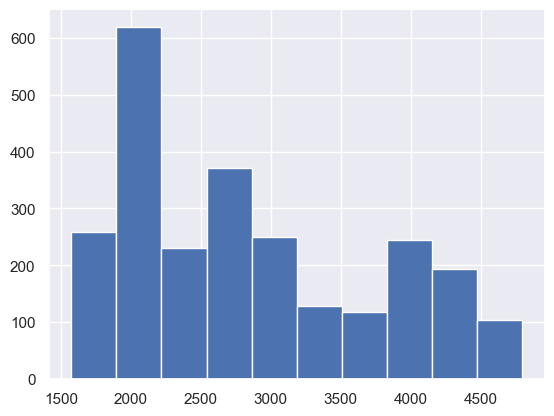

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

4369.01

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2855.0394715931748

In [10]:
close_sd = df['Close/Last'].std()
close_sd

875.0283116122431

In [11]:
sigma1 = close_mean + close_sd
sigma1

3730.067783205418

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4605.096094817661

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5042.610250623782

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2538
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2013-06-14 to 2023-06-13')

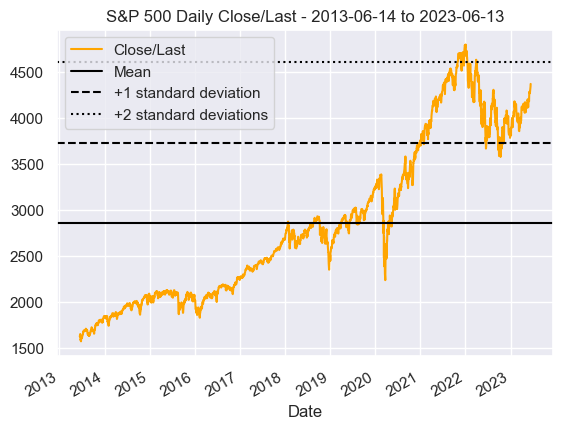

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2013-06-14 to 2023-06-13')

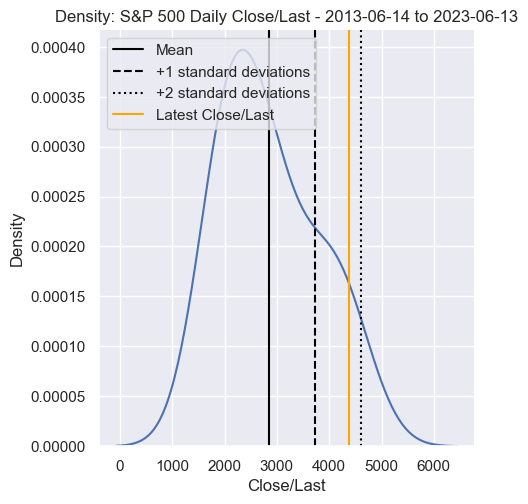

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.7301960500196032

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results